In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
plt.style.use('ggplot')

In [49]:
import warnings
warnings.filterwarnings('ignore')

Step 1: Import data set and split into training and testing

In [50]:
full = pd.read_csv('/Users/nguyenthaohau/Desktop/National Economic University/NEU 2022-2023 HK01/Data Mining/Exercise chapter 8/titanic_data.csv',na_values=["?"], na_filter=True, dtype={'age':np.float64, 'fare':np.float64})

In [51]:
full.head(10)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,"New York, NY"
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,"Hudson, NY"
7,8,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,"Belfast, NI"
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,"Bayside, Queens, NY"
9,10,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,"Montevideo, Uruguay"


Step 2: Data cleaning

In [52]:
full.isnull().sum()

x               0
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
home.dest     564
dtype: int64

The 'Age', 'Fare', 'Cabin', 'Embarked' columns have missing values. First we fill the missing 'Embarked' with the mode.

In [53]:
full.embarked.mode() #mode shows the values appear the most

0    S
Name: embarked, dtype: object

In [54]:
full['embarked'].fillna('S',inplace=True) 
#Fill NA/NaN values using the specified method; Series or None: Object with missing values filled or None if inplace=True.

We have 1 missing value in Fare.
Solution: Since 'Fare' is mainly related to 'Pclass', we should check which class this person belongs to.

In [55]:
full[full.fare.isnull()]

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1225,1226,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


It's a passenger from Pclass 3, so we'll fill the missing value with the median fare of Pclass 3.

In [56]:
full.fare.fillna(full[full.pclass==3]['fare'].median(),inplace=True)

There are a lot of missing values in Cabin, maybe there is difference between the survivalrate of people who has Cabin number and those who hasn't

In [57]:
#Access a group of rows and columns by label(s) or a boolean array.
full.loc[full.cabin.notnull(), 'cabin']=1
full.loc[full.cabin.isnull(), 'cabin']=0

In [58]:
full.cabin.isnull().sum()

0

Text(0.5, 1.0, 'Survival Rate')

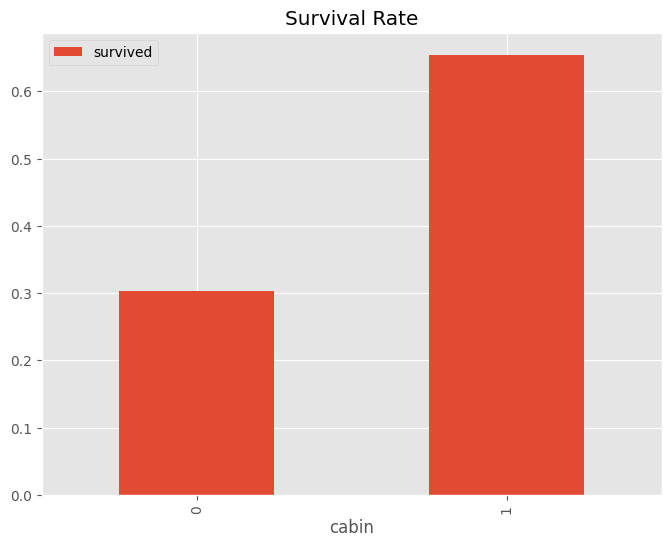

In [59]:
pd.pivot_table(full,index=['cabin'],values=['survived']).plot.bar(figsize=(8,6))
plt.title('Survival Rate')

In [60]:
##We can also plot the count of 'Cabin' to see some patterns:
cabin= pd.crosstab(full.cabin,full.survived) #choose the sequences and column
cabin.rename(index={0:'no cabin', 1:'cabin'}, columns={0.0: 'No', 1.0:'Yes'}, inplace=True)
cabin

survived,No,Yes
cabin,,
no cabin,707,307
cabin,102,193


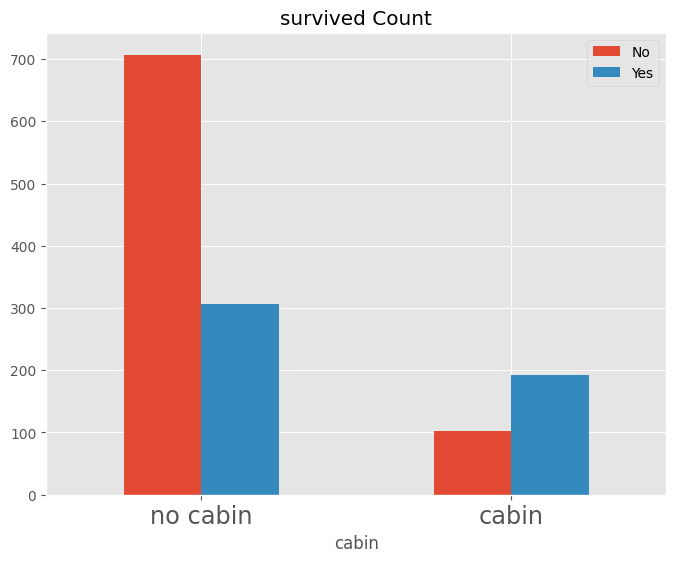

In [61]:
cabin.plot.bar(figsize=(8,6))
plt.xticks(rotation=0,size='xx-large')
plt.title('survived Count')
plt.xlabel('cabin')
plt.legend()

From the plot, we can conclude that there is far more chace for a passanger to survive if we know his/her 'Cabin'

In [62]:
###Cleaning the Age column:
#Extract Title for 'Name':
full['title'] = full['name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [63]:
full.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: title, dtype: int64

In [64]:
pd.crosstab(full.title,full.sex)

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


All the 'Title' belongs to one kind of gender except for 'Dr'.

In [65]:
full[(full.title=='Dr')&(full.sex=='female')]

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,title
181,182,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,"New York, NY",Dr


So the PassengerId of the female 'Dr' is '797'. Then we map the 'Title'.

In [66]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

In [69]:
full.title=full.title.map(nn)

In [70]:
# assign the female 'Dr' to 'Rarewoman'
full.loc[full.x==182,'title']='Rarewoman'

In [72]:
full.title.value_counts()

Mr           765
Miss         260
Mrs          197
Master        61
Rarewoman      1
Name: title, dtype: int64

In [75]:
full[full.title=='Master']['sex'].value_counts()

male    61
Name: sex, dtype: int64

In [77]:
full[full.title=='Master']['age'].describe()

count    53.000000
mean      5.482704
std       4.161483
min       0.333300
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: age, dtype: float64

In [78]:
full[full.title=="Miss"]['age'].describe()

count    210.000000
mean      21.774207
std       12.249132
min        0.166700
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: age, dtype: float64

* 'Master' mainly stands for little boy, but we also want to find little girl. Because children tend to have higher survival rate.
* For the 'Miss' with a Age record, we can simply determine whether a 'Miss' is a little girl by her age.
* For the 'Miss' with no Age record, we use (Parch!=0). Since if it's a little girl, she was very likely to be accompanied by parents.

In [79]:
###We'll create a function to filter the girls. The function can't be used if 'Age' is Na, so first we fill the missing values with '999':
full.age.fillna(999,inplace=True)

In [80]:
def girl(aa):
    if (aa.age!=999)&(aa.title=="Miss")&(aa.age<=14):
        return 'Girl'
    elif (aa.age==999)&(aa.title=="Miss")&(aa.parch!=0):
        return 'Girl'
    else:
        return aa.title


In [81]:
full['title']=full.apply(girl,axis=1)

In [82]:
full.title.value_counts()

Mr           765
Miss         201
Mrs          197
Master        61
Girl          59
Rarewoman      1
Name: title, dtype: int64

In [83]:
###Next we fill the missing 'Age' according to their 'Title':
full[full.age==999]['age'].value_counts()

999.0    263
Name: age, dtype: int64

In [87]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.age==999)&(full.title==i),'age']=full.loc[full.title==i,'age'].median()

In [88]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          1309 non-null   int64  
 1   pclass     1309 non-null   int64  
 2   survived   1309 non-null   int64  
 3   name       1309 non-null   object 
 4   sex        1309 non-null   object 
 5   age        1309 non-null   float64
 6   sibsp      1309 non-null   int64  
 7   parch      1309 non-null   int64  
 8   ticket     1309 non-null   object 
 9   fare       1309 non-null   float64
 10  cabin      1309 non-null   object 
 11  embarked   1309 non-null   object 
 12  home.dest  745 non-null    object 
 13  title      1284 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 143.3+ KB


In [90]:
full['sex'] = full['sex'].map({'male':0, 'female':1})
full['embarked'] = full['embarked'].map({'S':0,'C':1,'Q':2})
full.head()

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,title
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,1,0,"St Louis, MO",Miss
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,1,0,"Montreal, PQ / Chesterville, ON",Master
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,1,0,"Montreal, PQ / Chesterville, ON",Girl
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,1,0,"Montreal, PQ / Chesterville, ON",Mr
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,1,0,"Montreal, PQ / Chesterville, ON",Mrs


In [91]:
full = full.drop(['name','ticket','cabin','x','home.dest','title'], axis=1)
full.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,0
1,1,1,0,0.9167,1,2,151.5500,0
2,1,0,1,2.0000,1,2,151.5500,0
3,1,0,0,30.0000,1,2,151.5500,0
4,1,0,1,25.0000,1,2,151.5500,0


In [93]:
X = full[['pclass','sex','age','sibsp','parch','fare','embarked']]
y = full['survived']

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
y_train.value_counts()

0    647
1    400
Name: survived, dtype: int64

In [97]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled =ros.fit_resample(X_train,y_train)

In [98]:
y_resampled.value_counts()

0    647
1    647
Name: survived, dtype: int64

In [99]:
clf = DecisionTreeClassifier(max_depth=3,random_state=0)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

In [100]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.8092


[Text(0.5, 0.875, 'sex <= 0.5\ngini = 0.5\nsamples = 1294\nvalue = [647, 647]'),
 Text(0.25, 0.625, 'fare <= 21.852\ngini = 0.391\nsamples = 736\nvalue = [540, 196]'),
 Text(0.125, 0.375, 'age <= 14.0\ngini = 0.319\nsamples = 476\nvalue = [381, 95]'),
 Text(0.0625, 0.125, 'gini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(0.1875, 0.125, 'gini = 0.293\nsamples = 454\nvalue = [373, 81]'),
 Text(0.375, 0.375, 'sibsp <= 3.5\ngini = 0.475\nsamples = 260\nvalue = [159, 101]'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 240\nvalue = [139, 101]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.75, 0.625, 'pclass <= 2.5\ngini = 0.31\nsamples = 558\nvalue = [107, 451]'),
 Text(0.625, 0.375, 'fare <= 26.125\ngini = 0.086\nsamples = 333\nvalue = [15, 318]'),
 Text(0.5625, 0.125, 'gini = 0.167\nsamples = 109\nvalue = [10, 99]'),
 Text(0.6875, 0.125, 'gini = 0.044\nsamples = 224\nvalue = [5, 219]'),
 Text(0.875, 0.375, 'fare <= 23.35\ngini = 0.483\nsamples = 225\nva

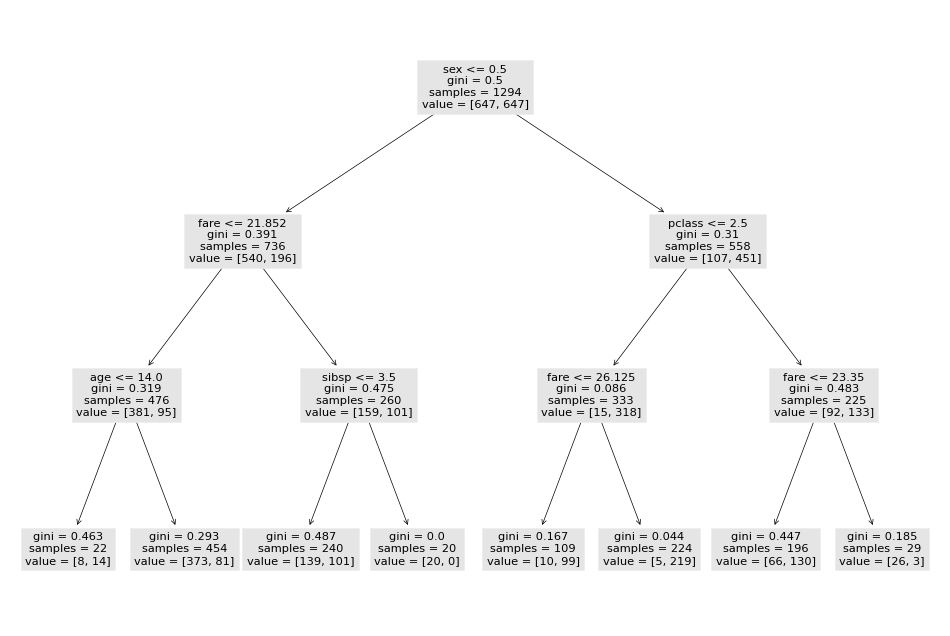

In [101]:
features = ['pclass','sex','age','sibsp','parch','fare','embarked']
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_resampled,y_resampled),feature_names=features)